In [1]:
import pandas as pd
import numpy as np
import re
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#folder_name_work = input('FolderName:')

# Second Block: importing the tree

In [3]:
os.chdir('/mnt/c/Users/ek23810/OneDrive - University of Bristol/term2_project/foldtree_tidy/outputs/mining/')  # Provide the new path here

In [4]:
#test_no = input("Input main folder name: ")
#subfolder = input("Input subfolder folder name: ")
#filename = test_no + '/' + subfolder +'/tree/new_labelled_tree.nwk'

#filename = test_no +'/' + subfolder + '/new_labelled_tree.nwk'

filename = 'redo8-full/tree-exp6/new_labelled_tree_3.nwk'

input = filename 

print('Input file:', input)

Input file: redo8-full/tree-exp6/new_labelled_tree_3.nwk


In [5]:
# Read the file as text
with open(input, 'r') as f:
    input = f.read()

# Print or process the text
print(input)

#NEXUS
begin taxa;
	dimensions ntax=4166;
	taxlabels
	ABA_A0A022Q8K3_ERYGU_Abscisica
	ABA_A0A096PAP2_OSTTA_Abscisica
	ABA_A0A0L0FU65_9EUKA19_GolgipHr
	ABA_A0A1B6PN16_SORBI_Abscisica
	ABA_A0A1P8B832_ARATH_GPCR-type
	ABA_A0A1X7U7W5_AMPQE_GolgipHr
	ABA_A0A1X7U8D0_AMPQE_Abscisica
	ABA_A0A2K3CVT4_CHLRE_Abscisica
	ABA_A0A2V2V3G4_TRYCR_GolgipHr
	ABA_A0A4W3JP42_CALMI_Gprotein-
	ABA_A0A4Y7MLL8_9CRUS_EOG090X06X
	ABA_A0A6B2L6N5_9EUKA2_Abscisica
	ABA_A0A7S0PT79_MICPS_Abscisica
	ABA_A0A7S1KTI7_9EUKA14_Abscisica
	ABA_A0A7S4NK09_9EUKA13_Abscisica
	ABA_B4DY51_HUMAN_cDNAFLJ55
	ABA_B7ZAQ6_HUMAN_GolgipHr
	ABA_D8LHI2_ECTSI_G-protein
	ABA_D8SSN0_SELML_Abscisica
	ABA_M2R5P5_ENTHI_Abscisica
	ABA_P0CG08_HUMAN_GolgipHr
	ABA_P38799_YEAST_Uncharacte
	ABA_Q54QM5_DICDI_GolgipHr
	ABA_Q5F448_CHICK_GolgipHr
	ABA_Q6DDW6_XENLA_GolgipHr
	ABA_Q9XIP7_ARATH_GPCR-type
	ABA_X5DNN3_HUMAN_Gprotein-
	Cera_A0A022QH24_ERYGU_Ceramidase
	Cera_A0A022QVF2_ERYGU_Uncharacte
	Cera_A0A022QY58_ERYGU_Alkalinep
	Cera_A0A086TL71_9FUNG_Dihydr

In [6]:
# Use regular expression to find the text between 'begin' and 'end'
match = re.search(r'begin\s+trees;(.*?)end;', input, re.DOTALL)

# Check if a match is found
if match:
    section = match.group(1).strip()
    print(section)
else:
    print("No section found between 'begin' and 'end'")

tree tree_1 = [&R] ((((Per1_A0A7S3D2J5_9EUKA12_Post-GPIa[&!name="Per1"]:0.40518,((Per1_A0A2P6NP32_9EUKA16_Post-GPIa[&!name="Per1"]:0.38841,Per1_A0A7S4P473_9EUKA13_Post-GPIa[&!name="Per1"]:0.37309)[&label=0,!name="Per1"]:0.02118,(Per1_C1MQN1_MICPS_Post-GPIa[&!name="Per1"]:0.3973,((Per1_M1K667_ENCCN_Post-GPIa[&!name="Per1"]:0.37836,Per1_A0A7S4HUR8_9EUKA25_Post-GPIa[&!name="Per1"]:0.38714)[&label=0,!name="Per1"]:0.00608,(Per1_P25625_YEAST_ProteinPE[&!name="Per1"]:0.3745,(Per1_O61975_CAEEL_Post-GPIa[&!name="Per1"]:0.3688,((Per1_C5KRB1_PERM5_Post-GPIa[&!name="Per1"]:0.34896,Per1_A0A6B2LAN2_9EUKA2_Post-GPIa[&!name="Per1"]:0.34804)[&label=0,!name="Per1"]:0.00908,((Per1_A0A0L0TDL2_ALLM3_Post-GPIa[&!name="Per1"]:0.32957,(Per1_E1ZME0_CHLVA_Post-GPIa[&!name="Per1"]:0.29972,(Per1_A9SY97_PHYPA_Post-GPIa[&!name="Per1"]:0.23437,(Per1_D8R2M7_SELML_Post-GPIa[&!name="Per1"]:0.23039,((Per1_I1GQQ5_BRADI_Post-GPIa[&!name="Per1"]:0.0837,Per1_A0A1B6P7D2_SORBI_Post-GPIa[&!name="Per1"]:0.0833)[&label=0,!name="

In [7]:
# Replace all occurrences of '/' with an empty string
#modified_content = section.replace('/', '')
#modified_content = modified_content.replace("\\'", "'")

In [48]:
# Regular expression to match the Full_Name and Label
matches = re.findall(r'(\w+_\w+_\w+_[\w-]+)\[&!name="(\w+)"\]', section)

df = pd.DataFrame(matches, columns=['Full_Name', 'Label'])

# Split the column
df[['gpcr_name', 'E1', 'E2', 'Protein_Short']] = df['Full_Name'].str.split('_', n=3, expand=True)

df['Entry Name'] = df['E1'] + '_' + df['E2']
df

,Full_Name,Label,gpcr_name,E1,E2,Protein_Short,Entry Name
0,Per1_A0A7S3D2J5_9EUKA12_Post-GPIa,Per1,Per1,A0A7S3D2J5,9EUKA12,Post-GPIa,A0A7S3D2J5_9EUKA12
1,Per1_A0A2P6NP32_9EUKA16_Post-GPIa,Per1,Per1,A0A2P6NP32,9EUKA16,Post-GPIa,A0A2P6NP32_9EUKA16
2,Per1_A0A7S4P473_9EUKA13_Post-GPIa,Per1,Per1,A0A7S4P473,9EUKA13,Post-GPIa,A0A7S4P473_9EUKA13
3,Per1_C1MQN1_MICPS_Post-GPIa,Per1,Per1,C1MQN1,MICPS,Post-GPIa,C1MQN1_MICPS
4,Per1_M1K667_ENCCN_Post-GPIa,Per1,Per1,M1K667,ENCCN,Post-GPIa,M1K667_ENCCN
...,...,...,...,...,...,...,...
4000,Rho_H3BDP9_LATCH_Dopaminer,Rho2z,Rho,H3BDP9,LATCH,Dopaminer,H3BDP9_LATCH
4001,Rho_A0A1L8GV63_XENLA_D1Adopa,Rho2z,Rho,A0A1L8GV63,XENLA,D1Adopa,A0A1L8GV63_XENLA
4002,Rho_P42289_XENLA_D1Adopa,Rho2z,Rho,P42289,XENLA,D1Adopa,P42289_XENLA
4003,Rho_Q7LZ75_CHICK_Dopaminer,Rho2z,Rho,Q7LZ75,CHICK,Dopaminer,Q7LZ75_CHICK


In [49]:
#import taxonomt
taxonomy = pd.read_csv('../../tax_sum_label.csv')
df_taxa = pd.merge(df, taxonomy,  left_on='E2', right_on= 'Org', how='inner')

In [50]:
#correct typo Glutamate
df_taxa.loc[df_taxa['Label_x'] == 'Glu2c1a', 'Label_x'] = 'Glut2c1a'

In [51]:
#Rename for Rhodopsin
df_taxa.loc[df_taxa['Label_x'] == 'rho1', 'Label_x'] = 'Rhao1'
df_taxa.loc[df_taxa['Label_x'] == 'Rho2q', 'Label_x'] = 'rg1'
df_taxa.loc[df_taxa['Label_x'] == 'Rho2r', 'Label_x'] = 'rg2'
df_taxa.loc[df_taxa['Label_x'] == 'Rho2s', 'Label_x'] = 'rg3'
df_taxa.loc[df_taxa['Label_x'] == 'Rho2t', 'Label_x'] = 'rg4'
df_taxa.loc[df_taxa['Label_x'] == 'Rho2v', 'Label_x'] = 'rg5'
df_taxa.loc[df_taxa['Label_x'] == 'Rho2w', 'Label_x'] = 'rh1'
df_taxa.loc[df_taxa['Label_x'] == 'Rho2x', 'Label_x'] = 'ri1'
df_taxa.loc[df_taxa['Label_x'] == 'Rho2y', 'Label_x'] = 'rj1'
df_taxa.loc[df_taxa['Label_x'] == 'Rho2z', 'Label_x'] = 'rk1'

In [52]:
# Filter the DataFrame to include only the desired Label
specific_label = 'ABA'# Replace with the specific label you want to display
filtered_df = df_taxa[df_taxa['gpcr_name'] == specific_label]

In [53]:
# Filter the DataFrame to include only the desired Label - cAMP
specific_label = 'cAMP'# Replace with the specific label you want to display

filtered_df = df_taxa[(df_taxa['gpcr_name'] == 'cAMP') | 
                      (df_taxa['gpcr_name'] == 'Git3') |
                      (df_taxa['gpcr_name'] == 'OA') |
                      (df_taxa['gpcr_name'] == 'PIPK')]
filtered_df = filtered_df[filtered_df['Label_x'] != 'rd4']
filtered_df.loc[filtered_df['Label_x'] == 'mPIPIK', 'Label_x'] = 'amPIPK'

In [54]:
# Filter the DataFrame to include only the desired Label - cAMP
specific_label = 'Rho'# Replace with the specific label you want to display

filtered_df = df_taxa[(df_taxa['gpcr_name'] == 'Rho') | 
                      (df_taxa['gpcr_name'] == 'Olf') ]


In [55]:
filtered_df

,Full_Name,Label_x,gpcr_name,E1,E2,Protein_Short,Entry Name,Org,Label_y,Clade1,Clade2,Clade5
1556,Rho_A0A7D5D491_ACRMI_Acropsin5,Rhao1,Rho,A0A7D5D491,ACRMI,Acropsin5,A0A7D5D491_ACRMI,ACRMI,1311_ACRMI,11_Metazoa,Early branchin metazoa,Anthozoa
1557,Rho_C3YQV0_BRAFL_G-protein,Rhao1,Rho,C3YQV0,BRAFL,G-protein,C3YQV0_BRAFL,BRAFL,1120_BRAFL,11_Metazoa,Bilateria,Cephalochordata
1558,Rho_G5ECD9_CAEEL_G-protein,Rhao1,Rho,G5ECD9,CAEEL,G-protein,G5ECD9_CAEEL,CAEEL,1218_CAEEL,11_Metazoa,Bilateria,Nematoda
1559,Rho_Q8TDV2_HUMAN_ProbableG,Rhao1,Rho,Q8TDV2,HUMAN,ProbableG,Q8TDV2_HUMAN,HUMAN,1111_HUMAN,11_Metazoa,Bilateria,Mammal
1560,Rho_A0A1L8GB01_XENLA_ProbableG,Rhao1,Rho,A0A1L8GB01,XENLA,ProbableG,A0A1L8GB01_XENLA,XENLA,1114_XENLA,11_Metazoa,Bilateria,Amphibia
...,...,...,...,...,...,...,...,...,...,...,...,...
4000,Rho_H3BDP9_LATCH_Dopaminer,rk1,Rho,H3BDP9,LATCH,Dopaminer,H3BDP9_LATCH,LATCH,1117_LATCH,11_Metazoa,Bilateria,Sarcioterygii
4001,Rho_A0A1L8GV63_XENLA_D1Adopa,rk1,Rho,A0A1L8GV63,XENLA,D1Adopa,A0A1L8GV63_XENLA,XENLA,1114_XENLA,11_Metazoa,Bilateria,Amphibia
4002,Rho_P42289_XENLA_D1Adopa,rk1,Rho,P42289,XENLA,D1Adopa,P42289_XENLA,XENLA,1114_XENLA,11_Metazoa,Bilateria,Amphibia
4003,Rho_Q7LZ75_CHICK_Dopaminer,rk1,Rho,Q7LZ75,CHICK,Dopaminer,Q7LZ75_CHICK,CHICK,1113_CHICK,11_Metazoa,Bilateria,Reptile


In [56]:
# Pivot the DataFrame to create a matrix of Label vs E2
heatmap_data = pd.crosstab(filtered_df['Label_y'], filtered_df['Label_x'])

In [57]:
# Create the heatmap
#plt.figure(figsize=(7, 10)) #change this to modify the heatmap
#sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", cbar=True)

#save it
#out_filename_figure = 'redo8-full/protein_analysis/' + specific_label + '.svg'
#plt.savefig(out_filename_figure, format="svg")

# Display the heatmap
#plt.title('Heatmap of Label vs E2')
#plt.show()

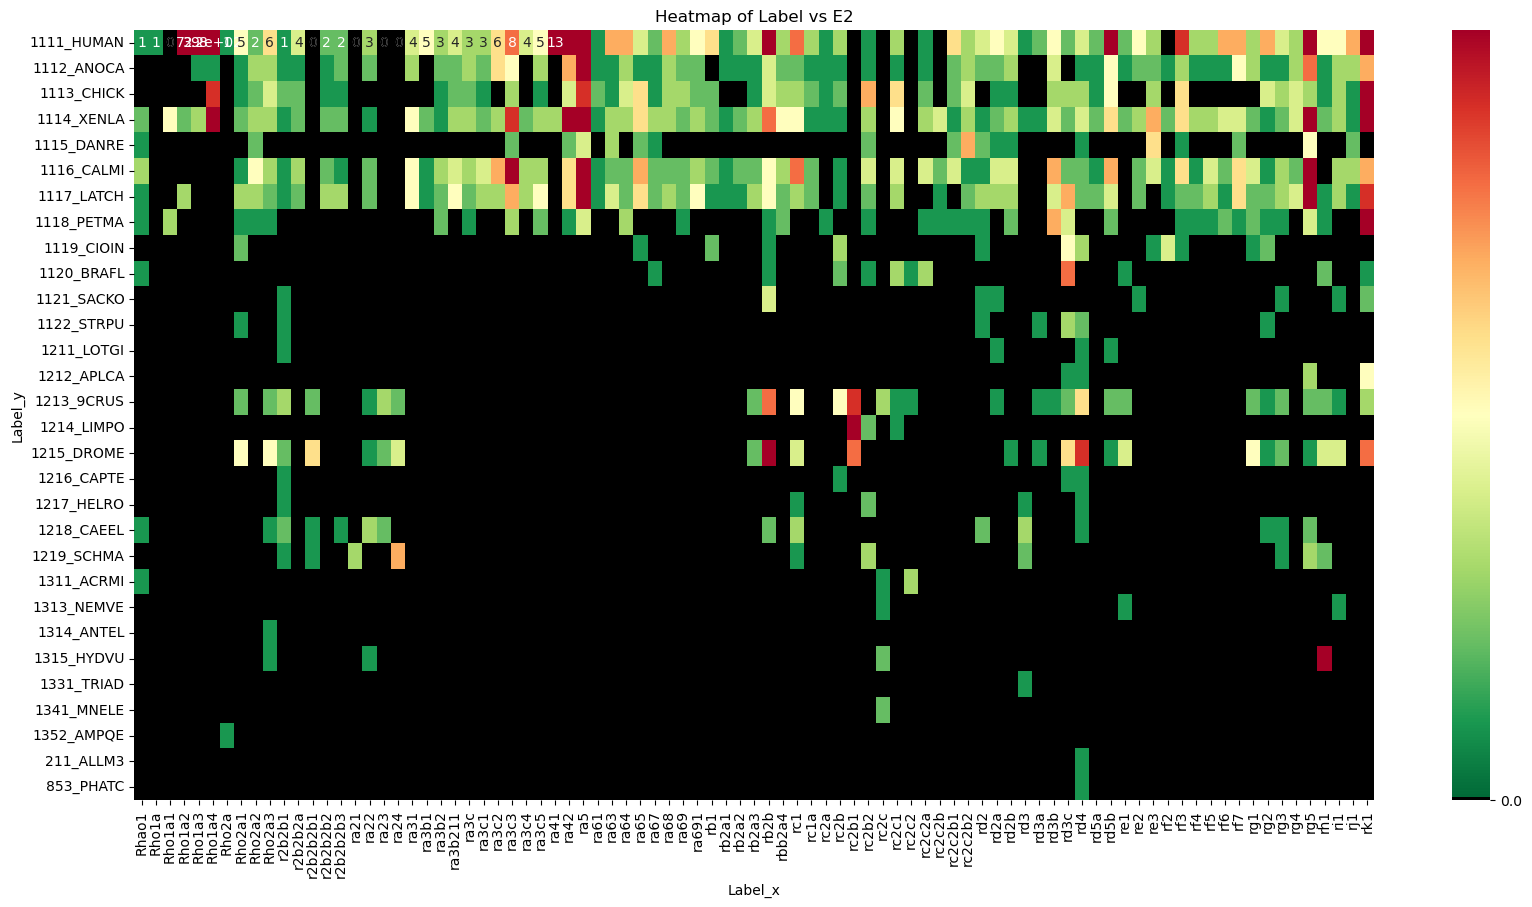

In [58]:
import matplotlib.colors as mcolors

# Create a custom colormap that replaces zero values with black
cmap = plt.cm.RdYlGn.reversed()
cmap = mcolors.ListedColormap(['black' if x == 0 else cmap(x) for x in np.linspace(0, 1, 256)])

# Create a normalization function that clips at 0 to ensure black is only for 0
#norm = mcolors.Normalize(vmin=heatmap_data.min().min(), vmax=heatmap_data.max().max())
norm = mcolors.Normalize(vmin=heatmap_data.min().min(), vmax=10)


# Create the heatmap
#plt.figure(figsize=(7, 10))  # Adjust this to modify the heatmap size

#only for rhodopsin
plt.figure(figsize=(20,10))  # Adjust this to modify the heatmap size

sns.heatmap(heatmap_data, annot=True, cmap=cmap, cbar=True, norm=norm, 
            cbar_kws={"ticks": np.linspace(heatmap_data.min().min(), heatmap_data.max().max(), num=11)})

# Overlay the zero values manually
for i in range(heatmap_data.shape[0]):
    for j in range(heatmap_data.shape[1]):
        if heatmap_data.iloc[i, j] == 0:
            plt.text(j + 0.5, i + 0.5, '0', color='black', ha='center', va='center')

# Save the heatmap
out_filename_figure = 'redo8-full/protein_analysis/' + specific_label + '.svg'
plt.savefig(out_filename_figure, format="svg")

# Display the heatmap
plt.title('Heatmap of Label vs E2')
plt.show()

In [59]:
## which proteins are there?
tree_metatada = pd.read_csv("redo8-full/tree_metadata/subset_expassy3.txt", sep= ",")

In [60]:
protein_names = tree_metatada[['Protein names','RL_Entry_Name']]

In [61]:
#specific_label = 'cAMPandGit3'
merge = pd.merge(filtered_df, protein_names, left_on='Entry Name', right_on= 'RL_Entry_Name', how='inner')
out_filename = 'redo8-full/protein_analysis/' + specific_label + '.csv'

In [62]:
merge.to_csv(out_filename, index = False, header = True)

In [76]:
# Filter the DataFrame to include only the desired Label
specific_label = 'GOST'  # Replace with the specific label you want to display
filtered_df = df_taxa[df_taxa['gpcr_name'] == specific_label]

# Pivot the filtered DataFrame to create a matrix of E2 vs Entry Name
heatmap_data = pd.crosstab(filtered_df['Label_y'], filtered_df['Label_x'])

# Flatten the crosstab for use with scatterplot
heatmap_data_flat = heatmap_data.reset_index().melt(id_vars='Label_y', var_name='Label_x', value_name='Count')

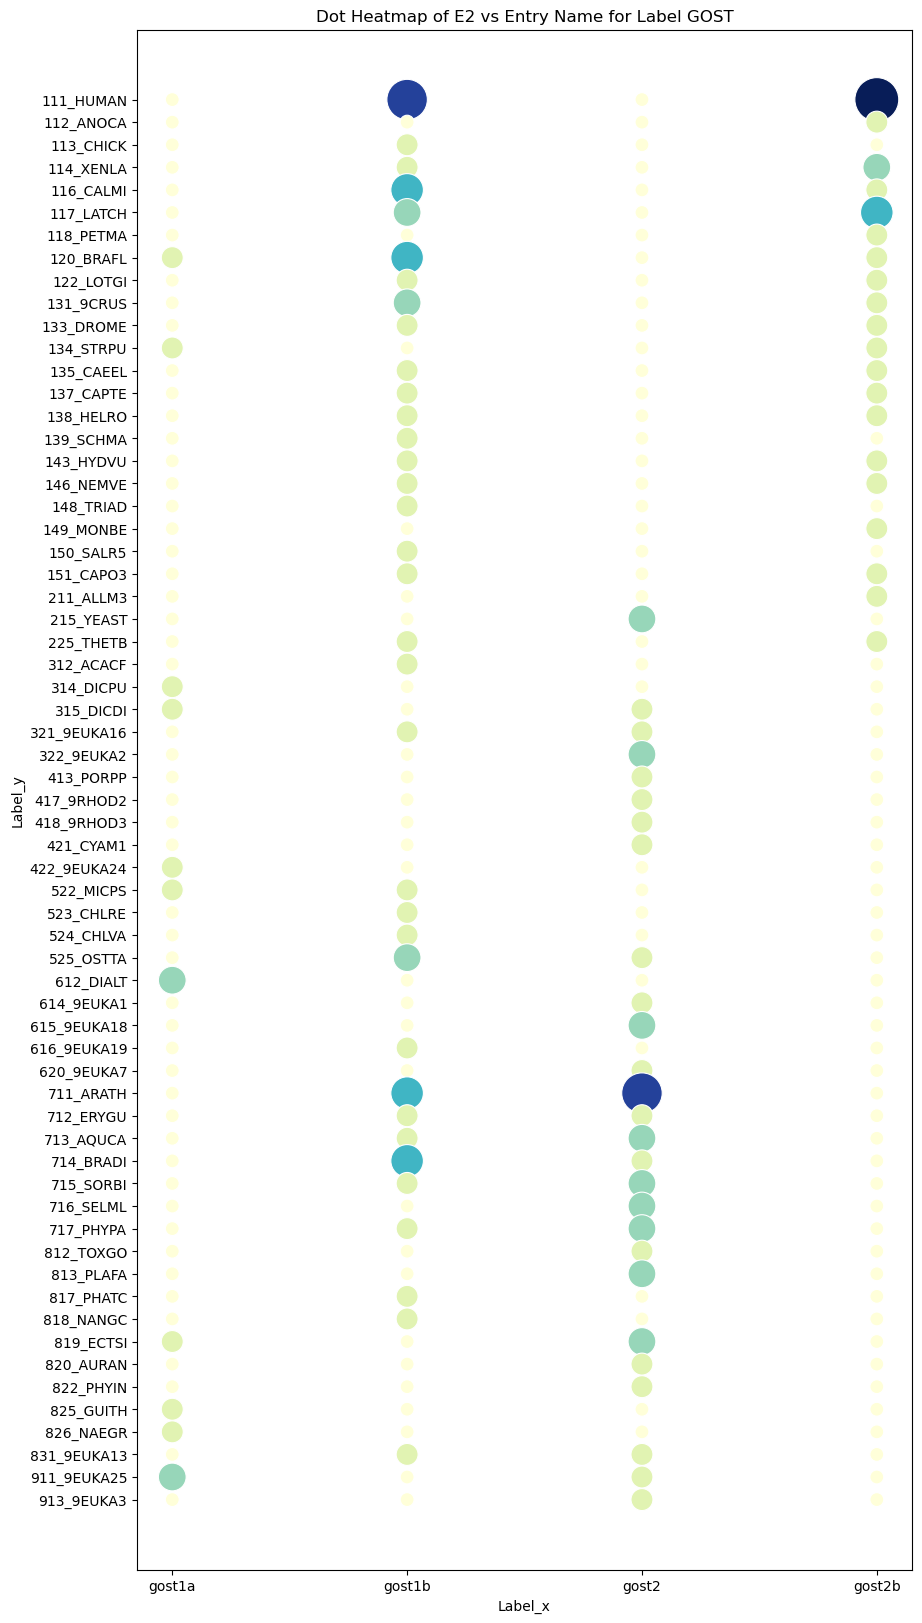

In [77]:
# Plot the dot heatmap
plt.figure(figsize=(10, 20))
sns.scatterplot(
    data=heatmap_data_flat,
    x='Label_x',
    y='Label_y',
    size='Count',
    sizes=(100, 1000),
    hue='Count',
    palette="YlGnBu",
    legend=False
)

# Customize the plot
plt.title(f'Dot Heatmap of E2 vs Entry Name for Label {specific_label}')
plt.show()

In [9]:
labelled_Tree = df[['Entry Name', 'Label', 'gpcr_name']]

In [10]:
## filtered tree data
folder_name_work = 'redo5-extendedv2'
out_filename_filter2 = folder_name_work + "/tree_metadata/filtered1_not_serpentine_tree.txt"

tree_data = pd.read_csv(out_filename_filter2)

In [11]:
merge = pd.merge(tree_data, labelled_Tree,  left_on='Entry Name', right_on= 'Entry Name', how='outer')

In [12]:
#export to csv
merge.to_csv('melindroso.csv', index = False, header = True)

In [13]:
merge

,Entry Name,Entry,Organism,Org,Scientific_Name,Gene,Protein names,gpcr,taxa,Accession,Rename,Label,gpcr_name
0,5HT1A_HUMAN,P08908,Homo sapiens (Human),HUMAN,Homo sapiens,5HT1A,5-hydroxytryptamine receptor 1A (5-HT-1A) (5-H...,PF00001,2759,PF00001,Rho,Rho5THClade1,Rho
1,5HT1A_XENLA,Q98998,Xenopus laevis (African clawed frog),XENLA,Xenopus laevis,5HT1A,5-hydroxytryptamine receptor 1A (5-HT-1A) (5-H...,PF00001,2759,PF00001,Rho,Rho5THClade1,Rho
2,5HT1D_HUMAN,P28221,Homo sapiens (Human),HUMAN,Homo sapiens,5HT1D,5-hydroxytryptamine receptor 1D (5-HT-1D) (5-H...,PF00001,2759,PF00001,Rho,Rho5THClade1,Rho
3,5HT1E_HUMAN,P28566,Homo sapiens (Human),HUMAN,Homo sapiens,5HT1E,5-hydroxytryptamine receptor 1E (5-HT-1E) (5-H...,PF00001,2759,PF00001,Rho,Rho5THClade1,Rho
4,5HT1R_DROME,P20905,Drosophila melanogaster (Fruit fly),DROME,Drosophila melanogaster,5HT1R,5-hydroxytryptamine receptor 1 (5-HT receptor)...,PF00001,2759,PF00001,Rho,Rho5THClade1,Rho
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,YKR5_CAEEL,P34311,Caenorhabditis elegans,CAEEL,Caenorhabditis elegans,YKR5,Probable G-protein coupled receptor C06G4.5,PF00001,2759,PF00001,Rho,NaN,NaN
4020,YPC1_YEAST,P38298,Saccharomyces cerevisiae (strain ATCC 204508 /...,YEAST,Saccharomyces cerevisiae,YPC1,Alkaline ceramidase YPC1 (EC 3.5.1.-) (Acyl-Co...,PF05875,2759,PF05875,Cera,CeraAlkaline,Cera
4021,YT66_CAEEL,Q11082,Caenorhabditis elegans,CAEEL,Caenorhabditis elegans,YT66,Probable G-protein coupled receptor B0563.6,PF00001,2759,PF00001,Rho,RhoClade1,Rho
4022,YWO1_CAEEL,Q10904,Caenorhabditis elegans,CAEEL,Caenorhabditis elegans,YWO1,Probable G-protein coupled receptor AH9.1,PF00001,2759,PF00001,Rho,RhoClade1,Rho


In [ ]:
### obtain the unnecessary proteins 
